In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset

Market = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\kaggle Datasets\marketing_data new.csv")

In [4]:
# Display the first few rows of the dataset

print("Dataset Preview:")
print(Market.head(15))

Dataset Preview:
    User_ID Engagement_Level                   Likes                  Shares  \
0         2             High   8,413,654,618,473,890   4,824,120,603,015,070   
1         4             High   6,987,951,807,228,910   2,914,572,864,321,600   
2         8             High   6,084,337,349,397,580  42,713,567,839,195,900   
3        13             High   6,305,220,883,534,130   7,537,688,442,211,050   
4        14             High  28,112,449,799,196,700   9,798,994,974,874,370   
5        16             High     789,156,626,506,024  41,708,542,713,567,800   
6        20             High   4,216,867,469,879,510  20,100,502,512,562,800   
7        23             High   5,823,293,172,690,760   2,814,070,351,758,790   
8        32             High   7,228,915,662,650,600   4,673,366,834,170,850   
9        34             High   9,618,473,895,582,320   3,869,346,733,668,340   
10       36             High  23,493,975,903,614,400  16,080,402,010,050,200   
11       43            

In [5]:
# Checking basic information about the dataset

print("\nDataset Information:")
print(Market.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   User_ID                 500 non-null    int64 
 1   Engagement_Level        500 non-null    object
 2   Likes                   500 non-null    object
 3   Shares                  500 non-null    object
 4   Comments                500 non-null    object
 5   Clicks                  500 non-null    object
 6   Engagement_with_Ads     500 non-null    object
 7   Time_Spent_on_Platform  500 non-null    object
 8   Purchase_History        500 non-null    int64 
 9   Purchase_Likelihood     500 non-null    int64 
 10  brand                   500 non-null    object
 11  buy                     500 non-null    object
dtypes: int64(3), object(9)
memory usage: 47.0+ KB
None


In [6]:
# Check for missing values

print("\nMissing Values:")
print(Market.isnull().sum())


Missing Values:
User_ID                   0
Engagement_Level          0
Likes                     0
Shares                    0
Comments                  0
Clicks                    0
Engagement_with_Ads       0
Time_Spent_on_Platform    0
Purchase_History          0
Purchase_Likelihood       0
brand                     0
buy                       0
dtype: int64


In [7]:
# Dropping rows with missing values (if any)

Market.dropna(inplace=True)

In [8]:
# Descriptive statistics

print("\nDescriptive Statistics:")
print(Market.describe())


Descriptive Statistics:
          User_ID  Purchase_History  Purchase_Likelihood
count  500.000000        500.000000           500.000000
mean   250.500000          0.448000             0.502000
std    144.481833          0.497787             0.500497
min      1.000000          0.000000             0.000000
25%    125.750000          0.000000             0.000000
50%    250.500000          0.000000             1.000000
75%    375.250000          1.000000             1.000000
max    500.000000          1.000000             1.000000


In [9]:
# EDA: Visualizing the data

print("\n---Exploratory Data Analysis (EDA)---")


---Exploratory Data Analysis (EDA)---


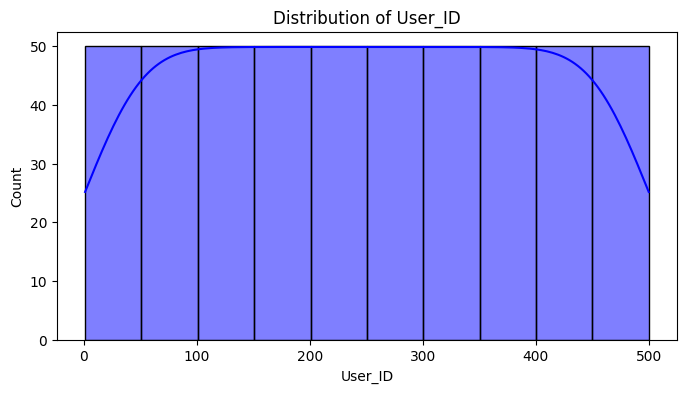

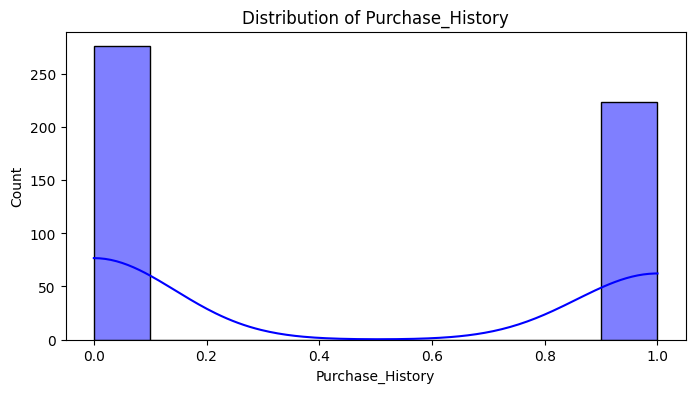

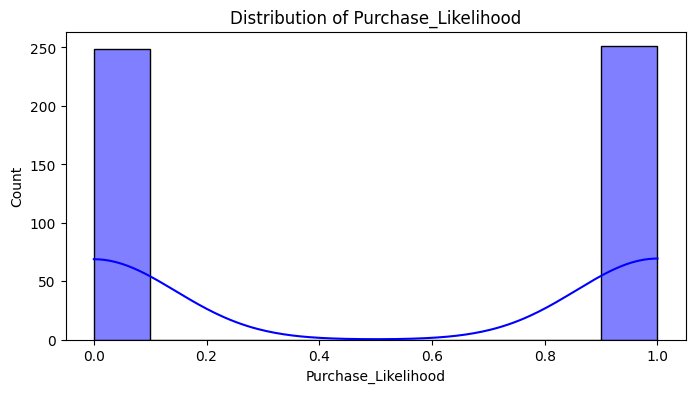

In [10]:
# Distribution of numerical features

numerical_cols = Market.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(Market[col], kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()

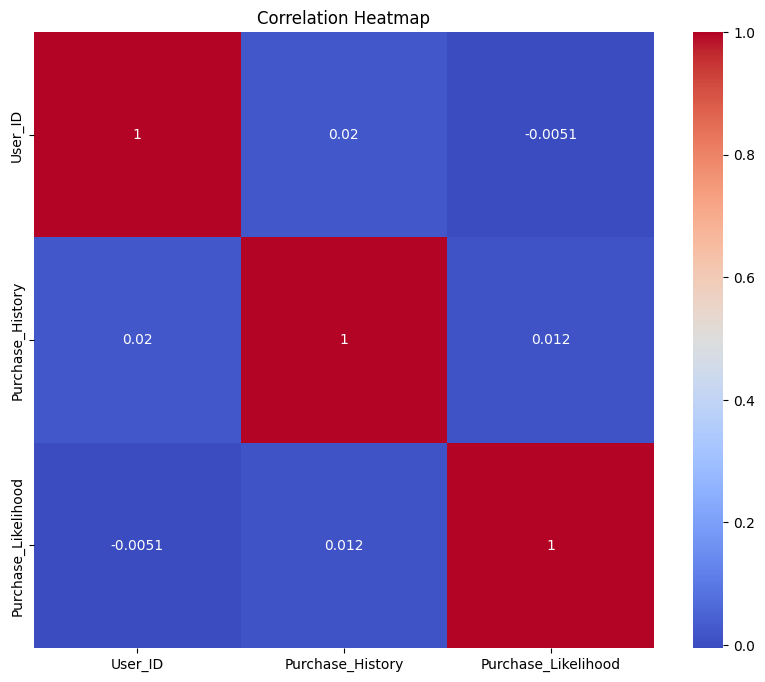

In [11]:
# Correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(Market[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

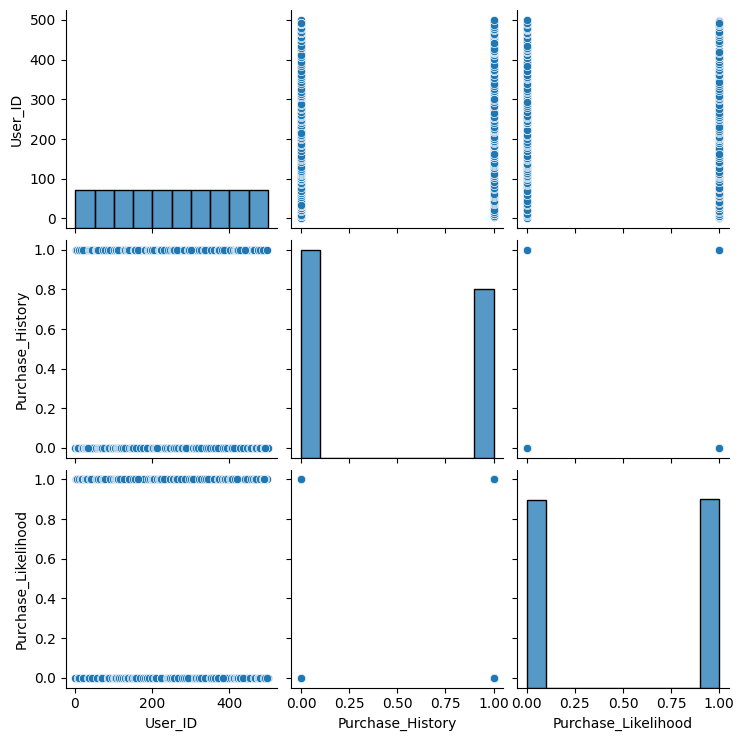

In [12]:
# Pairplot to explore relationships

sns.pairplot(Market[numerical_cols])
plt.show()

In [13]:
# Feature scaling for clustering

scaler = StandardScaler()
Market_scaled = scaler.fit_transform(Market[numerical_cols])


---Finding Optimal Number of Clusters---


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

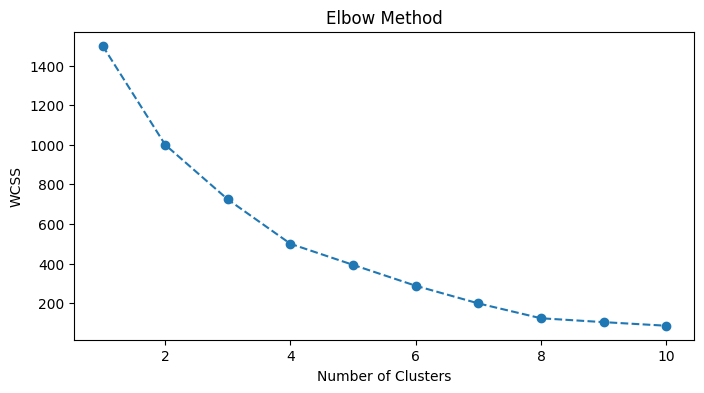

In [14]:
# Elbow method to find optimal number of clusters
print("\n---Finding Optimal Number of Clusters---")
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Market_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
# Silhouette Score to validate cluster choice

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(Market_scaled)
    score = silhouette_score(Market_scaled, labels)
    print(f"Silhouette Score for {k} clusters: {score}")

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 2 clusters: 0.3598603739798375
Silhouette Score for 3 clusters: 0.40660524031439604
Silhouette Score for 4 clusters: 0.5219673575651054
Silhouette Score for 5 clusters: 0.5212382099428282


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Choosing optimal clusters (e.g., k=4) based on analysis

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
Market['Cluster'] = kmeans.fit_predict(Market_scaled)

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


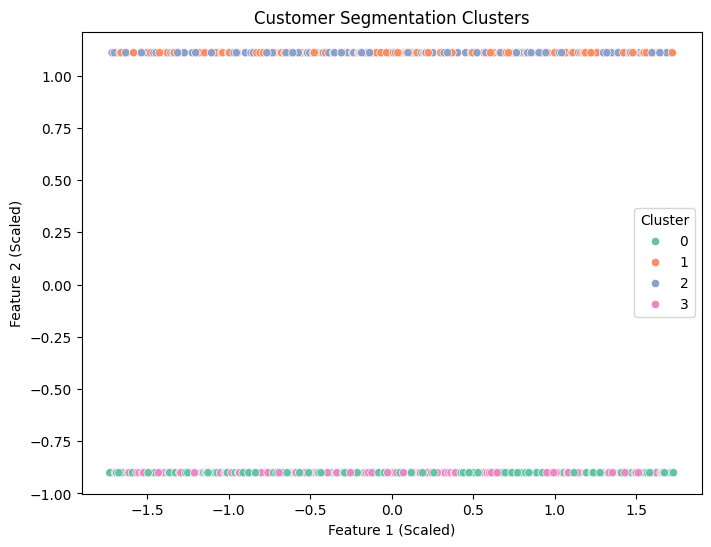

In [17]:
# Cluster Visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=Market_scaled[:, 0],
    y=Market_scaled[:, 1],
    hue=Market['Cluster'],
    palette="Set2"
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

In [18]:
# Saving the clustered dataset

Market.to_csv("Clustered_Marketing_Data.csv", index=False)
print("\nClustered data saved as 'Clustered_Marketing_Data.csv'.")


Clustered data saved as 'Clustered_Marketing_Data.csv'.
